# 3 KNN，K最邻近算法

## 3.1 KNN算法的原理

## 3.2 KNN算法的用法

### 3.2.1 KNN在分类算法中的应用

In [1]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
data = make_blobs(n_samples=200, centers=2,random_state=8)
X,y = data

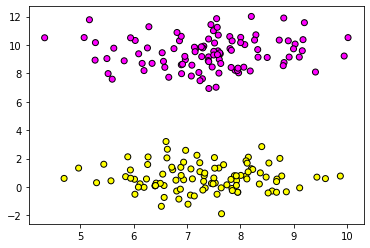

In [13]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.spring, edgecolors='k')
plt.show()

In [14]:
# Use KNN to fit
import numpy as np
clf = KNeighborsClassifier()
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
# code for plot
x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)


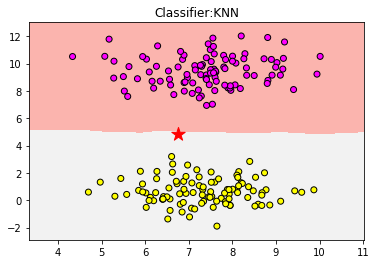

In [27]:
# plot figure
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.spring, edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:KNN")

# add a new point to test
plt.scatter(6.75, 4.82, marker='*', c='red', s=200)
plt.show()

In [31]:
# esyimate the Classification of the new point
print('\n')
print('The result of code running: ')
print('===============================================')
print('The Classification of new pointis : ',clf.predict([[6.75,4.82]]))
print('===============================================')
print('\n')



The result of code running: 
The Classification of new pointis :  [1]




### 3.2.2 KNN处理多元任务

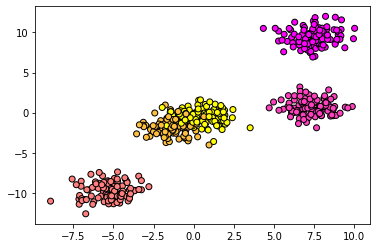

In [39]:
data2 = make_blobs(n_samples=500, centers=5, random_state=8)
X2,y2 = data2
plt.scatter(X2[:,0],X2[:,1], c=y2, cmap=plt.cm.spring, edgecolors='k')
plt.show()

In [40]:
# curve-fit data2 by KNN
clf = KNeighborsClassifier()
clf.fit(X2,y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
# code for plot
x_min, x_max = X2[:,0].min()-1,X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1,X2[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)


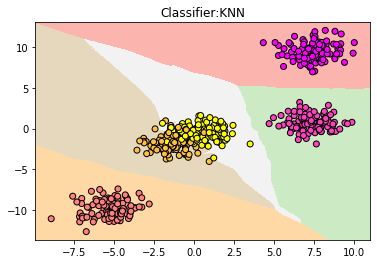

In [43]:
# plot figure
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)
plt.scatter(X2[:,0],X2[:,1], c=y2, cmap=plt.cm.spring, edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:KNN")
plt.show()

In [44]:
# Estimate the model
print('\n')
print('The result of code running : ')
print('===========================================')
print('the correction: {:.2f}'.format(clf.score(X2,y2)))
print('===========================================')
print('\n')



The result of code running : 
the correction: 0.96




### 3.2.3 KNN算法用于回归分析

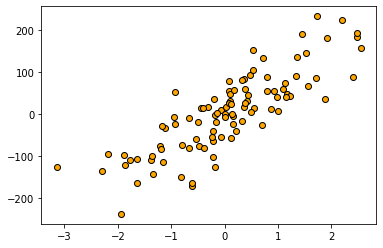

In [53]:
from sklearn.datasets import make_regression
X3,y3 = make_regression(n_features=1, n_informative=1, noise=50, random_state=8)
plt.scatter(X3,y3,c='orange',edgecolors='k')
plt.show()

In [54]:
# KNN Regresssion
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X3,y3)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

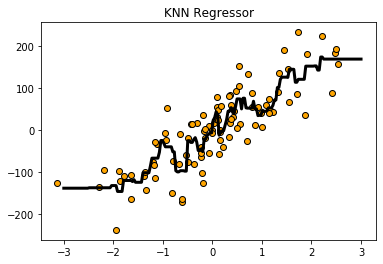

In [55]:
z3 = np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(X3,y3,c='orange',edgecolors='k')
plt.plot(z3,reg.predict(z3),c='k',linewidth=3)
plt.title('KNN Regressor')
plt.show()

In [56]:
# Estimate the model
print('\n')
print('===========================')
print('core : {:.2f}'.format(reg.score(X3,y3)))
print('===========================')
print('\n')



core : 0.77




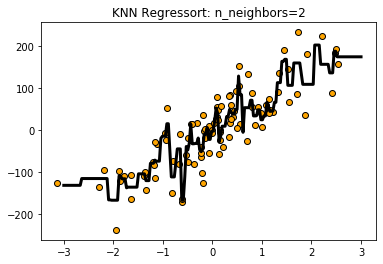

In [60]:
# Lower the number of n_neighbors to 2
reg2 = KNeighborsRegressor(n_neighbors=2)
reg2.fit(X3,y3)

plt.scatter(X3,y3,c='orange',edgecolors='k')
plt.plot(z3,reg2.predict(z3),c='k',linewidth=3)
plt.title('KNN Regressort: n_neighbors=2')
plt.show()

In [61]:
# Estimate the model
print('\n')
print('===========================')
print('core : {:.2f}'.format(reg2.score(X3,y3)))
print('===========================')
print('\n')



core : 0.86




## 3.3 K最近邻算法项目实战——酒的分类

### 3.3.1 对数据集进行分析

In [63]:
from sklearn.datasets import load_wine

wine_dataset = load_wine()

print('\n')
print('The result of code running : ')
print('========================================')
print('红酒数据集中的键 ： \n{}'.format(wine_dataset.keys()))
print('========================================')
print('\n')



The result of code running : 
红酒数据集中的键 ： 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])




In [65]:
# Use .shape to print data's overview

print('\n')
print('The result of code running : ')
print('========================================')
print('data overview : {}'.format(wine_dataset['data'].shape))
print('========================================')
print('\n')



The result of code running : 
data overview : (178, 13)




In [66]:
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 3.3.2 生成训练数据集和测试数据集

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'],wine_dataset['target'],random_state=0)

In [69]:
print('\n')
print('The result of code running : ')
print('========================================')
print('X_train sahpe : {}'.format(X_train.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_train shape : {}'.format(y_train.shape))
print('y_test shape : {}'.format(y_test.shape))
print('========================================')
print('\n')



The result of code running : 
X_train sahpe : (133, 13)
X_test shape : (45, 13)
y_train shape : (133,)
y_test shape : (45,)




### 3.3.3 使用KNN算法进行建模

In [74]:
# impoer KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

print('\n')
print('The result of code running : ')
print('=====================================')
knn.fit(X_train, y_train)
print(knn)
print('=====================================')
print('\n')



The result of code running : 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')




In [73]:
# score Use the test data
print('\n')
print('The result of code running : ')
print('=====================================')
print('The score of this model : {:.2f}'.format(knn.score(X_test,y_test)))
print('=====================================')
print('\n')



The result of code running : 
The score of this model : 0.76




In [76]:
# Use a new data to test
import numpy as np

X_new = np.array([[13.2, 2.77, 2.51, 18.5, 96.6, 1.04, 2.55, 0.57, 1.47, 6.2, 1.05, 3.33, 820]])

prediction = knn.predict(X_new)
print('\n')
print('The result of code running : ')
print('=====================================')
print('the class of new wine : {}'.format(wine_dataset['target_names'][prediction]))
print('=====================================')
print('\n')



The result of code running : 
the class of new wine : ['class_2']


